In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels


In [2]:
data = pd.read_csv('dataset.csv')
data_small = data[:100]
data.head()

columns = data.columns.values
attributes = columns[11:73]
positions = columns[74:]        # positions without description


In [ ]:
# od maruse za notranjo legendo
# from matplotlib.lines import Line2D
# from matplotlib import rcParams, cycler
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
#
# fig, ax = plt.subplots()
# ax.legend(custom_lines, ['Height', 'Weight'])

## Vizualizacijejeejejeje


#### Weight / height

In [58]:
print(data[data['Weight'] == 0].shape[0])

positions_data = {}
i = 0
for position in positions:
    for age, weight, height in data[data[position] == 20][['Age', 'Weight', 'Height']].values:
        positions_data[i] = {'Position': position, 'Age': age, 'Weight': weight, 'Height': height}
        i += 1
df = pd.DataFrame.from_dict(positions_data, orient='index')
df2 = df[df['Weight'] != 0]

average = {}
for position in positions:
    df_pos = df2[df2['Position'] == position]
    average[position] = {'Weight': df_pos['Weight'].mean(),
                         'Height': df_pos['Height'].mean(),
                         'How_many': df_pos.shape[0]}

pd.DataFrame(average).T.sort_values(by='Weight', ascending=False)

60588


,Weight,Height,How_many
Goalkeeper,80.132372,186.398869,10259.0
DefenderCentral,77.940155,184.643213,16643.0
Sweeper,76.489051,182.255474,137.0
Striker,74.848387,180.637766,17116.0
DefensiveMidfielder,73.609223,179.507403,8240.0
DefenderLeft,71.983208,178.045727,6670.0
DefenderRight,71.831074,177.888557,7376.0
MidfielderCentral,71.743884,178.180839,12713.0
WingBackLeft,71.043704,176.219563,961.0
WingBackRight,70.754011,176.221925,748.0


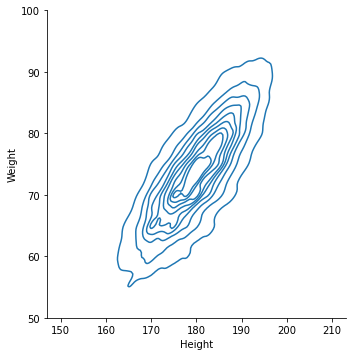

In [60]:
sns.displot(df2, x="Height", y="Weight", kind="kde")
plt.ylim(50, 100)
plt.savefig('2Dhw.pdf')
plt.show()

Primerjava centralnih pozicij

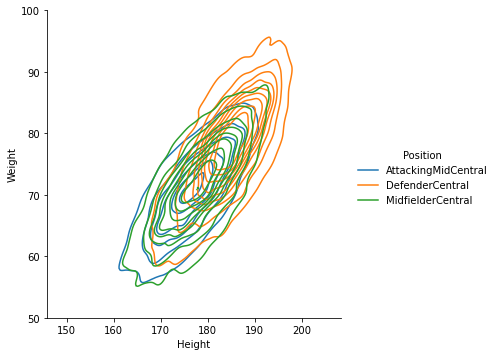

In [28]:
# fig = plt.figure()
sns.displot(df[df['Position'].isin(['DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'])],
            x="Height", y="Weight", kind="kde", hue="Position")
#
# handles = sns.displot(df[df['Position'].isin(['DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'])].sample(100),
#             x="Height", y="Weight", kind="kde", hue="Position", legend=False)
# handles.despine(left=True)
plt.ylim(50, 100)
# plt.tight_layout()
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(labels=['DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'], loc="upper left")
plt.savefig('2DDAM.pdf')
plt.show()

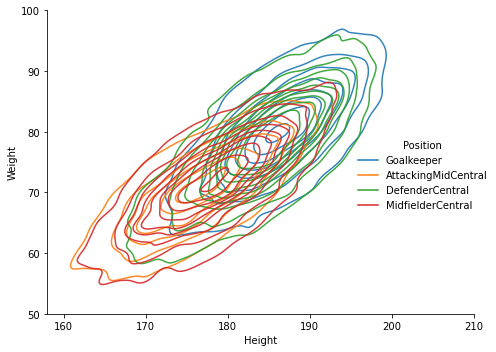

In [41]:
sns.displot(df[df['Position'].isin(['Goalkeeper', 'DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'])],
                      x="Height", y="Weight", kind="kde", hue="Position", alpha=0.9)
plt.ylim(50, 100)
plt.xlim(158, 210)
plt.tight_layout()
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(labels=['DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'], loc="upper left")
plt.savefig('2DGDAM2.pdf')
plt.show()

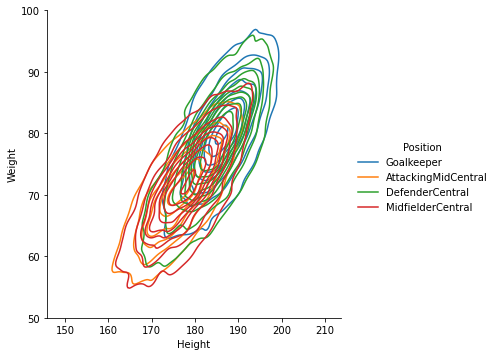

In [30]:
sns.displot(df[df['Position'].isin(['Goalkeeper', 'DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'])],
                      x="Height", y="Weight", kind="kde", hue="Position")
plt.ylim(50, 100)
# plt.tight_layout()
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(labels=['DefenderCentral', 'AttackingMidCentral', 'MidfielderCentral'], loc="upper left")
plt.savefig('2DGDAM.pdf')
plt.show()


Primerjava golmana in striker/midfielder

In [17]:
g = sns.displot(df[df['Position'].isin(['Goalkeeper', 'MidfielderCentral', 'Striker'])],
            x="Height", y="Weight", kind="kde", hue="Position")
# legend_out=False
# g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend(handles=[g])
plt.ylim(50, 100)
plt.savefig('2DGMS.pdf')
plt.show()


C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\project-2\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'legend_out'
  cset = contour_func(


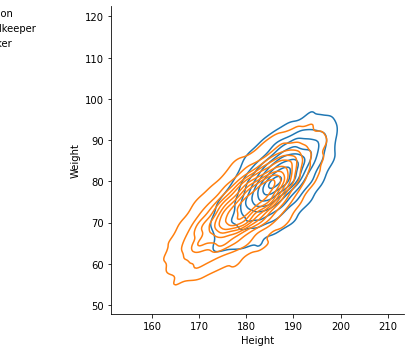

In [14]:
g = sns.displot(df[df['Position'].isin(['Goalkeeper', 'Striker'])],
            x="Height", y="Weight", kind="kde", hue="Position", legend_out="False")
g._legend.set_bbox_to_anchor((.1, 0.9))
plt.show()

C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\project-2\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'legend_out'
  cset = contour_func(


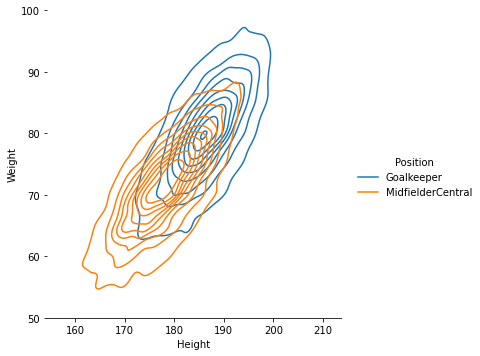

In [15]:
g = sns.displot(df[df['Position'].isin(['Goalkeeper', 'MidfielderCentral'])],
            x="Height", y="Weight", kind="kde", hue="Position", legend_out=False)
g.despine(left=True)
plt.ylim(50, 100)
plt.show()


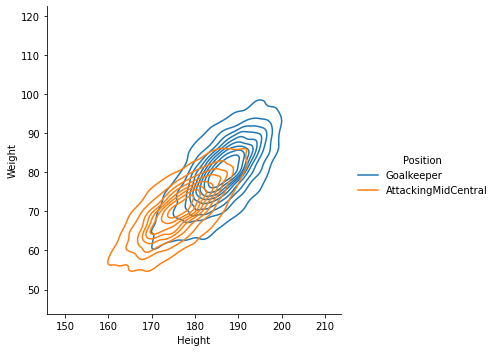

In [9]:
sns.displot(df[df['Position'].isin(['Goalkeeper', 'AttackingMidCentral'])],
                x="Height", y="Weight", kind="kde", hue="Position")
plt.ylim(50, 100)
plt.show()

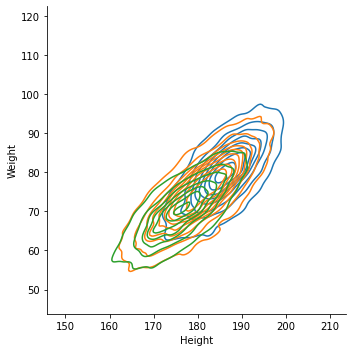

In [10]:
# fig, ax = plt.subplots(figsize=(8,8))
sns.displot(df[df['Position'].isin(['Goalkeeper', 'Striker', 'AttackingMidCentral'])],
                x="Height", y="Weight", kind="kde", hue="Position", legend=False)

# ax.annotate(xy=(200, 80), xycoords='data', xytext=(-15, 20),textcoords='offset points',
#         text="Goalkeeper", color='blue', weight='semibold')
# ax.text(x=0.5, y=0.5, s="Striker", color='orange', weight='semibold')  dva locena grafa
plt.show()

C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\project-2\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


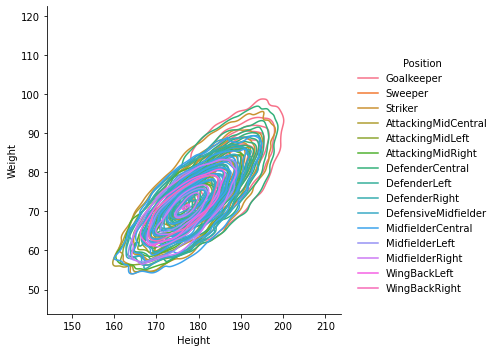

In [11]:
sns.displot(df, x="Height", y="Weight", kind="kde", hue="Position")
plt.show()

##### Correlated positions
Povezave med napadalci, branilci, sredinskimi; levimi, desnimi
Golman ni z nikomer, nepovezani napadalci in branilci

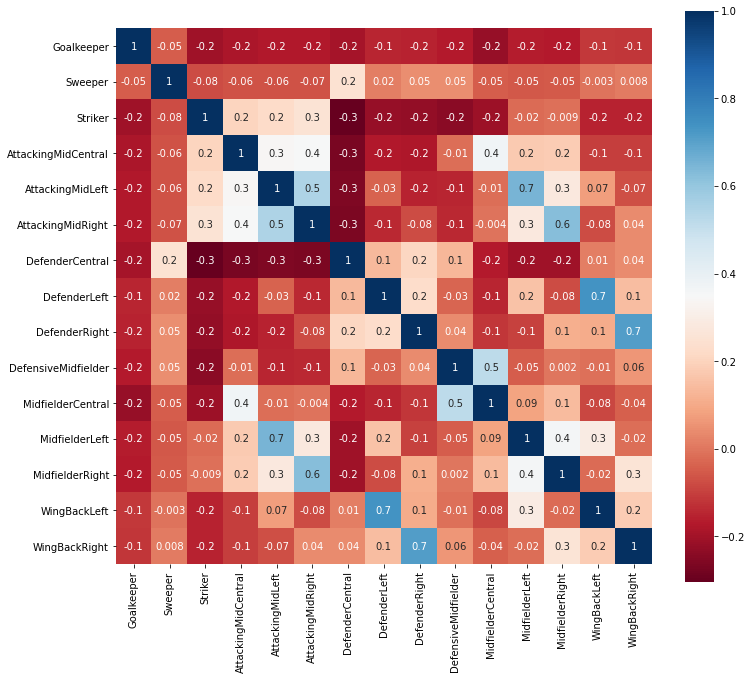

In [55]:
corrmat = data[positions].corr()
f, ax = plt.subplots(figsize=(12, 10.5))
sns.heatmap(corrmat, annot=True, fmt='.1g', square=True, cmap='RdBu')
plt.savefig('corrpos.pdf')
# barve so se kul bone, PuBuGn, copper, seismic, coolwarm


#### Density of age
kde??? neki zber

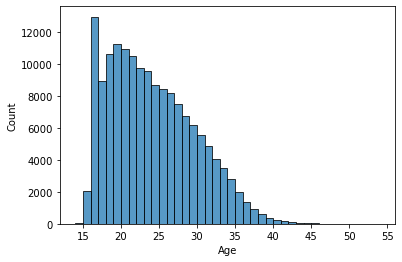

In [56]:
sns.histplot(data=data['Age'], binwidth=1)
plt.savefig('age.pdf')

<AxesSubplot:xlabel='Age', ylabel='Count'>

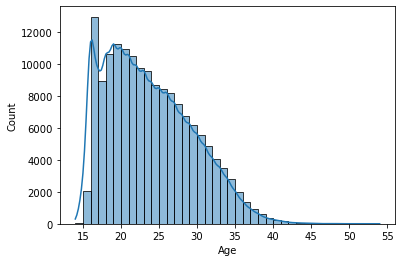

In [14]:
sns.histplot(data=data['Age'], binwidth=1, kde=True)

C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\project-2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


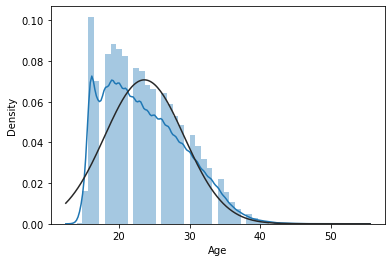

In [15]:
sns.distplot(data['Age'], fit=stats.norm)
plt.show()

#### Distribution of age on different main positions

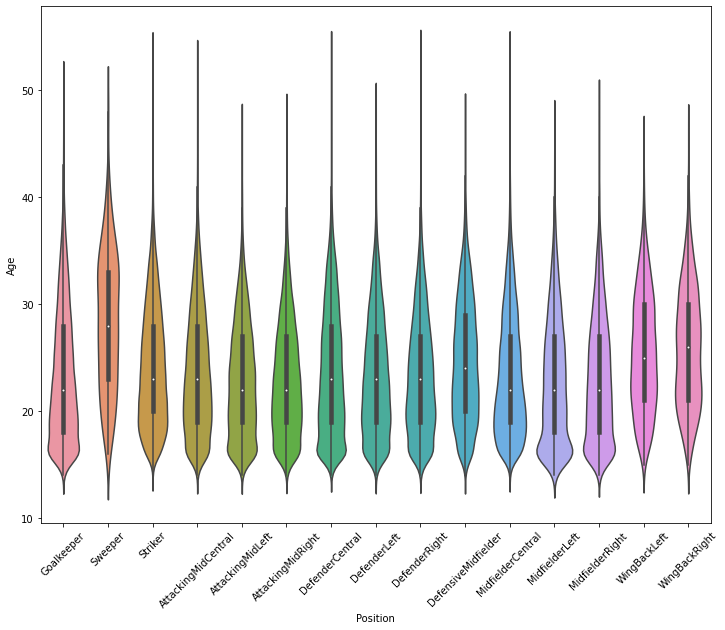

In [69]:
fg, ax = plt.subplots(figsize=(12, 9.5))
gg = sns.violinplot(data=df, x='Position', y='Age')
gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
plt.savefig('violin4.pdf')
plt.show()

#### Correlation Age - attributes

C:\Users\ursau\AppData\Local\Programs\Anaconda\envs\project-2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


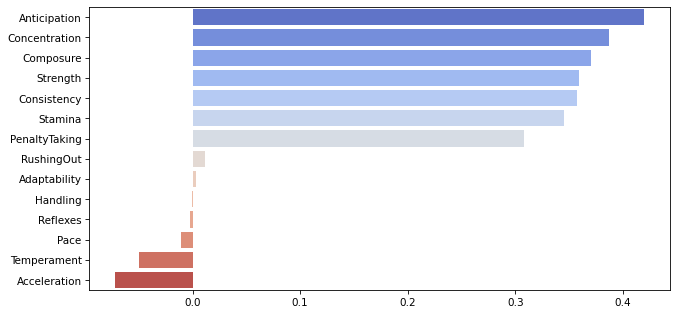

In [85]:
plt.figure(figsize=(10,5), dpi=75)
age_corr = data[attributes].corrwith(data['Age']).sort_values(ascending=False)
age_corr2 = age_corr.take([i for i in range(7)] + [i for i in range(55, 62)])
sns.barplot(age_corr2.values, age_corr2.index, orient="h", palette="coolwarm")
plt.savefig("correlation.pdf")

different age groups

In [19]:
young = data[data['Age'] <= 22]
middle = data[(data['Age'] <= 32) & (data['Age'] > 22)]
old = data[data['Age'] > 32]

young_corr = young[attributes].corrwith(young['Age']).sort_values(ascending=False)
middle_corr = middle[attributes].corrwith(middle['Age']).sort_values(ascending=False)
old_corr = old[attributes].corrwith(old['Age']).sort_values(ascending=False)

narišem še povprečne vrednosti teh atributov glede na starost - scatter

loh probam več na isti graf

<AxesSubplot:xlabel='Age', ylabel='Bravery'>

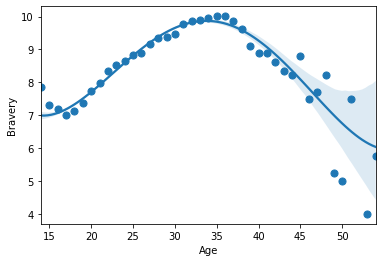

In [20]:
sns.regplot(data=data, x='Age', y='Bravery', x_estimator=np.mean, x_ci=None, order=4, truncate=True)

<AxesSubplot:xlabel='Age', ylabel='Leadership'>

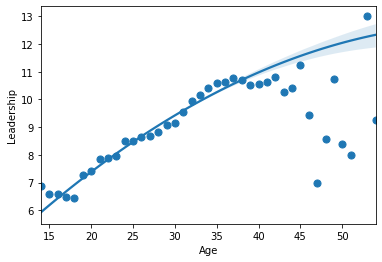

In [21]:
sns.regplot(data=data, x='Age', y='Leadership', x_estimator=np.mean, x_ci=None, order=2)

<AxesSubplot:xlabel='Age', ylabel='Adaptability'>

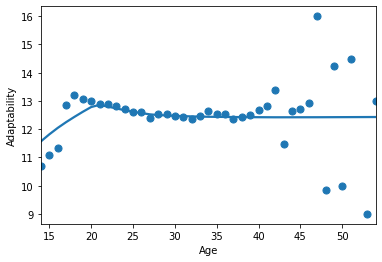

In [22]:
sns.regplot(data=data, x='Age', y='Adaptability', x_estimator=np.mean, x_ci=None, lowess=True)


<AxesSubplot:xlabel='Age', ylabel='Ambition'>

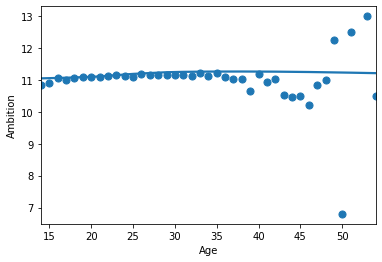

In [23]:
sns.regplot(data=data, x='Age', y='Ambition', x_estimator=np.mean, x_ci=None, lowess=True)


<AxesSubplot:xlabel='Age', ylabel='Sportsmanship'>

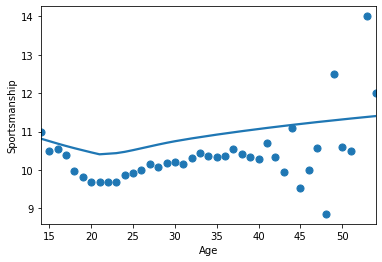

In [24]:
sns.regplot(data=data, x='Age', y='Sportsmanship', x_estimator=np.mean, x_ci=None, lowess=True)


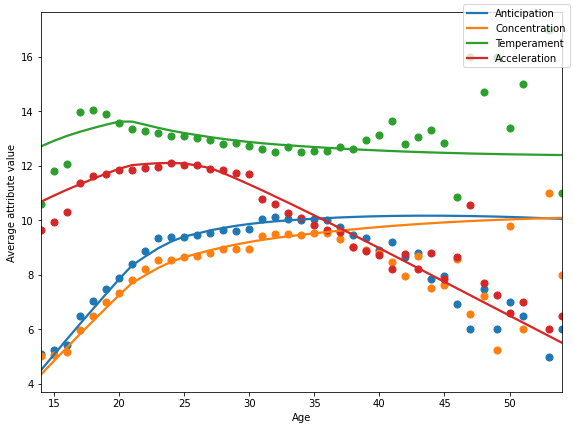

In [25]:
fig = plt.figure(figsize=(8,6))
sns.regplot(data=data, x='Age', y='Anticipation', x_estimator=np.mean, x_ci=None, lowess=True, truncate=False)
sns.regplot(data=data, x='Age', y='Concentration', x_estimator=np.mean, x_ci=None, lowess=True, truncate=False)
# sns.regplot(data=data, x='Age', y='Composure', x_estimator=np.mean, x_ci=None, lowess=True, truncate=False)
# sns.regplot(data=data, x='Age', y='Pace', x_estimator=np.mean, x_ci=None, lowess=True, truncate=False)
sns.regplot(data=data, x='Age', y='Temperament', x_estimator=np.mean, x_ci=None, lowess=True, truncate=False)
sns.regplot(data=data, x='Age', y='Acceleration', x_estimator=np.mean, x_ci=None, lowess=True, truncate=False)
# fig.legend(labels=['Anticipation','Concentration', 'Composure', 'Pace','Temperament', 'Acceleration'])
fig.legend(labels=['Anticipation','Concentration', 'Temperament', 'Acceleration'])
fig.tight_layout()
plt.ylabel('Average attribute value')
plt.show()

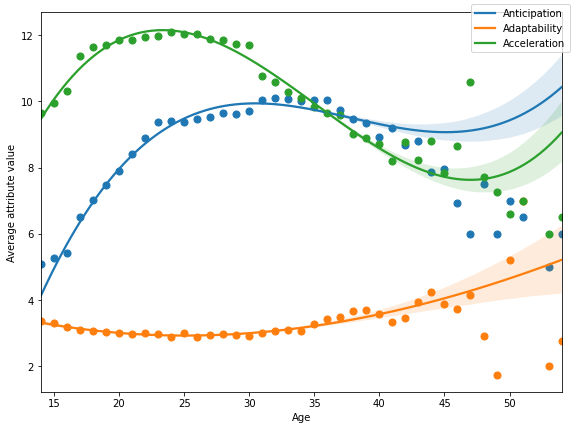

In [91]:
fig = plt.figure(figsize=(8,6))
sns.regplot(data=data, x='Age', y='Anticipation', x_estimator=np.mean, x_ci=None, order=3)
sns.regplot(data=data, x='Age', y='Handling', x_estimator=np.mean, x_ci=None, order=3)
sns.regplot(data=data, x='Age', y='Acceleration', x_estimator=np.mean, x_ci=None, order=3)
# fig.legend(labels=['Anticipation','Concentration', 'Composure', 'Pace','Temperament', 'Acceleration'])
fig.legend(labels=['Anticipation','Adaptability', 'Acceleration'])
fig.tight_layout()
plt.ylabel('Average attribute value')
plt.show()

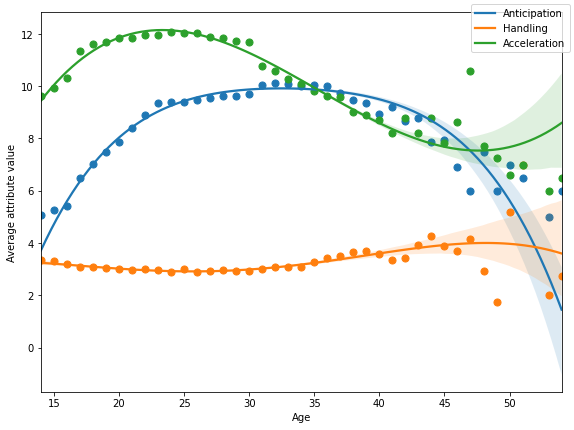

In [96]:
fig = plt.figure(figsize=(8,6))
sns.regplot(data=data, x='Age', y='Anticipation', x_estimator=np.mean, x_ci=None, order=4)
sns.regplot(data=data, x='Age', y='Handling', x_estimator=np.mean, x_ci=None, order=4)
sns.regplot(data=data, x='Age', y='Acceleration', x_estimator=np.mean, x_ci=None, order=4)
# fig.legend(labels=['Anticipation','Concentration', 'Composure', 'Pace','Temperament', 'Acceleration'])
fig.legend(labels=['Anticipation','Handling', 'Acceleration'])
fig.tight_layout()
plt.ylabel('Average attribute value')
plt.savefig('avgattr.pdf')
plt.show()


In [92]:
print(data.shape[0])
print(data[data['Age'] > 40].shape[0])
print(data[data['Age'] > 45].shape[0])

159541
450
51


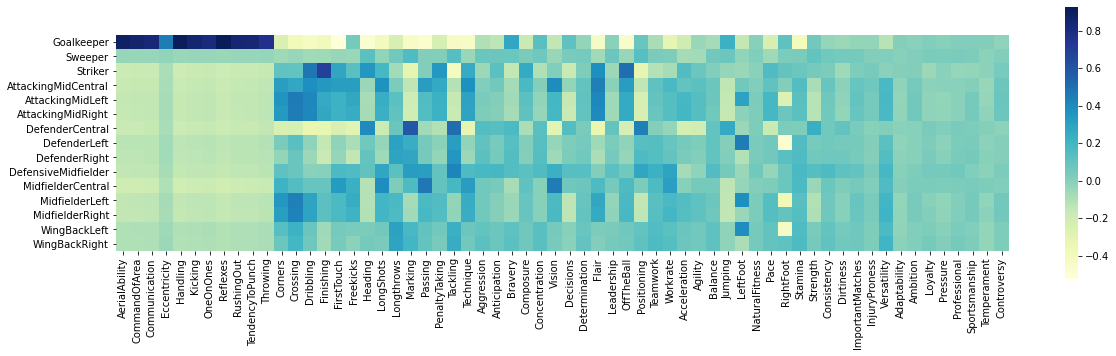

In [55]:
pos_atr = data[np.concatenate((positions, attributes))]
corr_pos_atr = pos_atr.corr()
corr_pos_atr = corr_pos_atr.loc[positions, attributes]
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr_pos_atr, square=True, cmap='YlGnBu');

če bom mejbi kej rabla

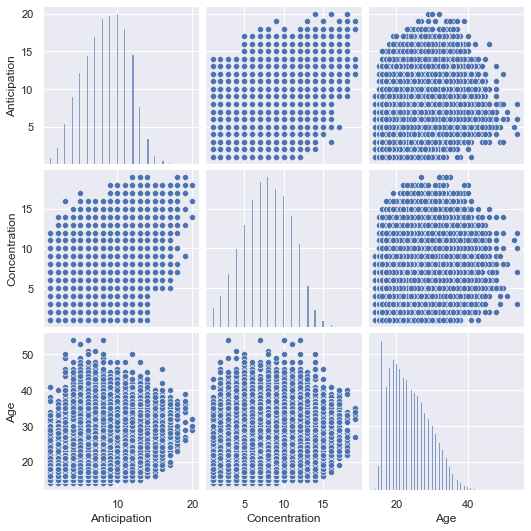

In [10]:
sns.set()
sns.pairplot(data[list(age_corr[:2].index.values) + ['Age']], height = 2.5)
plt.show();

handles ce jih res rabs tkole nardit

In [ ]:
activity_time = usage[['ACTIVITY', 'TIMESTAMP']]
activity_time['TIMESTAMP'] = pd.to_datetime(usage['TIMESTAMP']).dt.hour
g = sns.histplot(data=activity_time, x='TIMESTAMP', hue='ACTIVITY', discrete=True, bins=activity_time['ACTIVITY'].unique())
handles = g.get_legend().legendHandles
labels = list(activity_time['ACTIVITY'].unique())
g.legend(handles=handles, bbox_to_anchor=(1, 1), loc=2, labels=list(labels), title='ACTIVITY')
plt.show()